In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

import warnings
warnings.filterwarnings('ignore')

In [2]:
cifar10 = tf.keras.datasets.cifar10
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
print('Training data shape   : ', X_train.shape)
print('Training labels shape : ', Y_train.shape)
print('Testing data shape    : ', X_test.shape)
print('Testing labels shape  : ', Y_test.shape)

Training data shape   :  (50000, 32, 32, 3)
Training labels shape :  (50000, 1)
Testing data shape    :  (10000, 32, 32, 3)
Testing labels shape  :  (10000, 1)


In [4]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

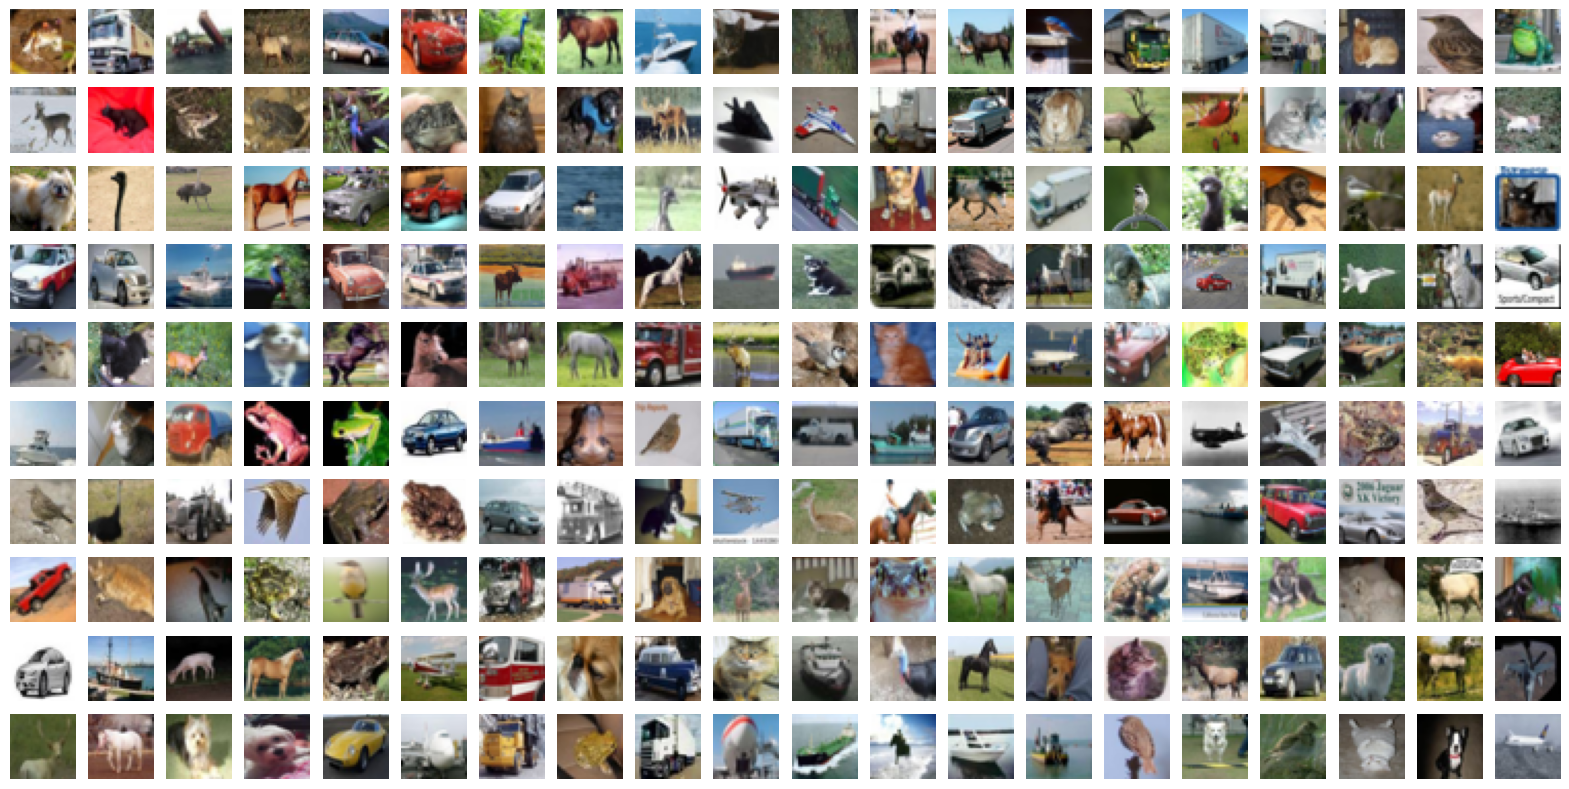

In [5]:
plt.figure(figsize = (20,10))
for i in range(200):
  plt.subplot(10,20, i+1)
  plt.axis('off')
  plt.imshow(X_train[i])

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.2)

In [7]:
print('Training data shape      : ', x_train.shape)
print('Training labels shape    : ', y_train.shape)
print()
print('Validation data shape    : ', x_val.shape)
print('Validation labels shape  : ', y_val.shape)
print()
print('Testing data shape       : ', X_test.shape)
print('Testing labels shape     : ', Y_test.shape)

Training data shape      :  (40000, 32, 32, 3)
Training labels shape    :  (40000, 1)

Validation data shape    :  (10000, 32, 32, 3)
Validation labels shape  :  (10000, 1)

Testing data shape       :  (10000, 32, 32, 3)
Testing labels shape     :  (10000, 1)


In [8]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_val   = to_categorical(y_val, num_classes = 10)

In [9]:
print('Training data shape      : ', x_train.shape)
print('Training labels shape    : ', y_train.shape)
print()
print('Validation data shape    : ', x_val.shape)
print('Validation labels shape  : ', y_val.shape)
print()
print('Testing data shape       : ', X_test.shape)
print('Testing labels shape     : ', Y_test.shape)

Training data shape      :  (40000, 32, 32, 3)
Training labels shape    :  (40000, 10)

Validation data shape    :  (10000, 32, 32, 3)
Validation labels shape  :  (10000, 10)

Testing data shape       :  (10000, 32, 32, 3)
Testing labels shape     :  (10000, 1)


In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 0.1,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True
)

train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train, y_train, batch_size = 400)

In [11]:
val_datagen = ImageDataGenerator(rescale = 1/255)
val_datagen.fit(x_val)

val_generator = val_datagen.flow(x_val, y_val)

In [12]:
# transfor learning
vgg_model = tf.keras.applications.VGG19(
    include_top = False,
    weights = 'imagenet',
    input_shape = (32,32,3)
)
vgg_model.summary()

80134624/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                              

In [13]:
model = tf.keras.models.Sequential()
model.add(vgg_model)
model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 1, 1, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 1024)              525312    
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 256)               262400    
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 21864266 (83.41 MB)
Trainable params: 2186

In [14]:
model.compile(optimizer = Adam(),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [15]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 50,
    verbose = 1
)

Epoch 1/50
100/100 [==============================] - 52s 295ms/step - loss: 2.3162 - accuracy: 0.1089 - val_loss: 2.2637 - val_accuracy: 0.1431
Epoch 2/50
100/100 [==============================] - 29s 286ms/step - loss: 2.3012 - accuracy: 0.1072 - val_loss: 2.2804 - val_accuracy: 0.1051
Epoch 3/50
100/100 [==============================] - 29s 285ms/step - loss: 2.0559 - accuracy: 0.1865 - val_loss: 1.8896 - val_accuracy: 0.2283
Epoch 4/50
100/100 [==============================] - 28s 279ms/step - loss: 1.8842 - accuracy: 0.2340 - val_loss: 1.8543 - val_accuracy: 0.2563
Epoch 5/50
100/100 [==============================] - 28s 282ms/step - loss: 1.8448 - accuracy: 0.2612 - val_loss: 1.8049 - val_accuracy: 0.2840
Epoch 6/50
100/100 [==============================] - 28s 281ms/step - loss: 1.7970 - accuracy: 0.2825 - val_loss: 1.7874 - val_accuracy: 0.2976
Epoch 7/50
100/100 [==============================] - 28s 281ms/step - loss: 1.7569 - accuracy: 0.3096 - val_loss: 1.6984 - val_ac

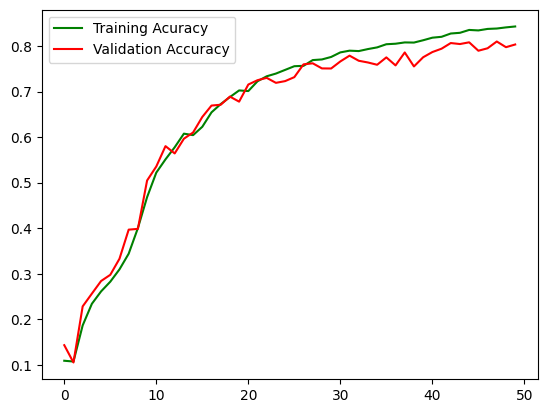

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure()
plt.plot(acc,color = 'green',label = 'Training Acuracy')
plt.plot(val_acc,color = 'red',label = 'Validation Accuracy')
plt.legend()

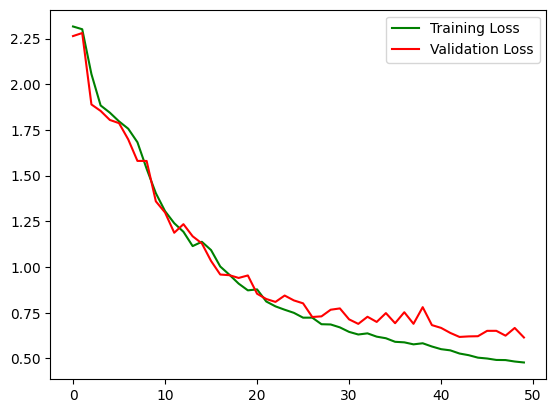

In [17]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss,color = 'green',label = 'Training Loss')
plt.plot(val_loss,color = 'red',label = 'Validation Loss')
plt.legend()

In [18]:
# Evaluation
x_test = X_test/255
y_pred = np.argmax(model.predict(x_test), axis = 1)
y_pred.shape

313/313 [==============================] - 3s 8ms/step


(10000,)

In [19]:
from sklearn.metrics import accuracy_score
print('Testing Accuracy : ', accuracy_score(Y_test, y_pred))

Testing Accuracy :  0.799


In [21]:
np.argmax(model.predict(x_test[:5]), axis = 1)

1/1 [==============================] - 1s 603ms/step


array([3, 1, 1, 0, 6])

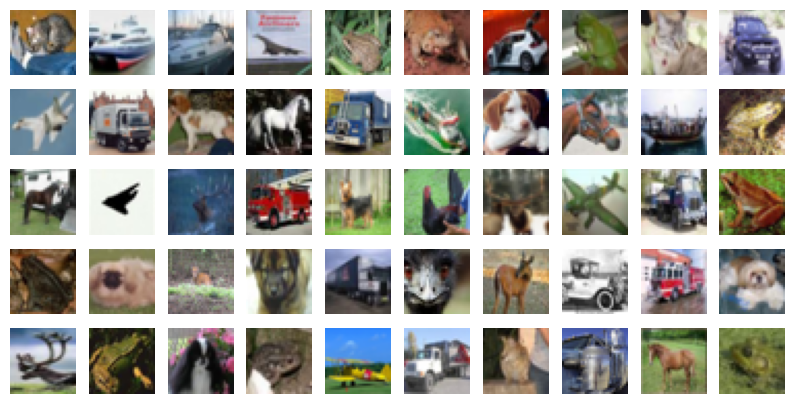

In [25]:
plt.figure(figsize = (10,5))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.axis('off')
  plt.imshow(X_test[i])

In [22]:
def make_prediction(x):
  classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  preds = model.predict(x)
  preds = np.argmax(preds, axis = 1)
  for pred in preds:
    print(classes[pred])

In [29]:
make_prediction(x_test[:10])

1/1 [==============================] - 0s 55ms/step
cat
automobile
automobile
airplane
frog
frog
automobile
frog
cat
automobile


In [24]:
make_prediction(x_test[10:20])

1/1 [==============================] - 0s 18ms/step
airplane
truck
horse
horse
truck
frog
dog
horse
ship
frog
